In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [3]:
images = []
root = '/content/drive/MyDrive/gan-getting-started/monet_jpg'
for file in tqdm(os.listdir(root)):
    images.append(plt.imread(root+'/'+file))
images = np.array(images)

100%|██████████| 300/300 [02:02<00:00,  2.45it/s]


In [4]:
from sklearn.manifold import TSNE

In [5]:
tsne = TSNE(n_components=2).fit_transform(images.reshape((300, -1)))

In [6]:
tsne.shape

(300, 2)

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=30).fit(tsne)

In [9]:
selected = []
for i in range(30):
    selected.append(np.nonzero([kmeans.labels_ == i])[1][0])

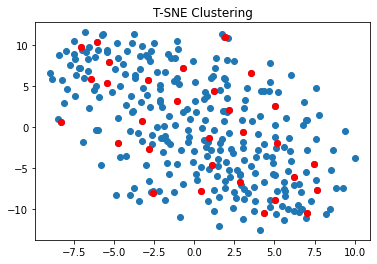

In [10]:
plt.title('T-SNE Clustering')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[selected][:,0], tsne[selected][:,1], c='red')